In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier        
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [2]:
attrition=pd.read_csv("HR Employee Attrition.csv")

In [3]:
attrition.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
attrition.shape

(1470, 35)

In [5]:
attrition["Attrition"]=np.where(attrition.Attrition== "Yes",1,0)

In [6]:
attrition.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# Understanding the Variable Types

In [7]:
attrition.dtypes

Age                          int64
Attrition                    int32
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [8]:
attrition.isnull().any()

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

In [9]:
categorical=attrition.select_dtypes(include="object")
categorical

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
...,...,...,...,...,...,...,...,...
1465,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
1466,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,Y,No
1467,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Y,Yes
1468,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,Y,No


In [10]:
print(len(categorical.columns))

8


In [11]:
numerical=attrition.select_dtypes(include=['float64','int64'])
len(numerical.columns)

26

In [12]:
categorical.head()

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No


In [13]:
numerical.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,1,1,2,94,3,2,...,1,80,0,8,0,1,6,4,0,5
1,49,279,8,1,1,2,3,61,2,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1373,2,2,1,4,4,92,2,1,...,2,80,0,7,3,3,0,0,0,0
3,33,1392,3,4,1,5,4,56,3,1,...,3,80,0,8,3,3,8,7,3,0
4,27,591,2,1,1,7,1,40,3,1,...,4,80,1,6,3,3,2,2,2,2


# Plotting

In [14]:
#Univariate Analysis

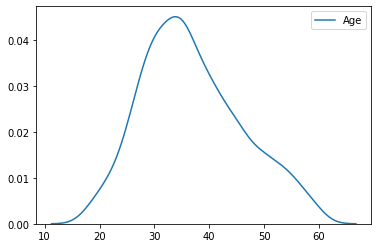

In [15]:
sns.kdeplot(attrition["Age"])

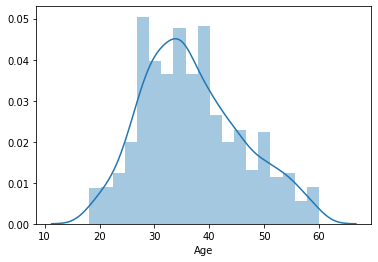

In [16]:
sns.distplot(attrition["Age"])

In [17]:
numerical.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [18]:
numerical.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,1,1,2,94,3,2,...,1,80,0,8,0,1,6,4,0,5
1,49,279,8,1,1,2,3,61,2,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1373,2,2,1,4,4,92,2,1,...,2,80,0,7,3,3,0,0,0,0
3,33,1392,3,4,1,5,4,56,3,1,...,3,80,0,8,3,3,8,7,3,0
4,27,591,2,1,1,7,1,40,3,1,...,4,80,1,6,3,3,2,2,2,2


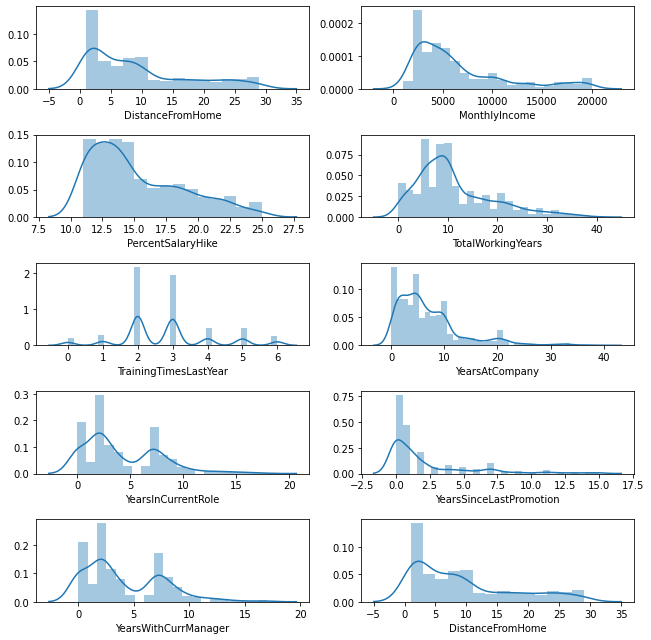

In [19]:
fig,ax=plt.subplots(5,2,figsize=(9,9))
sns.distplot(attrition["DistanceFromHome"],ax=ax[0,0])
sns.distplot(attrition["MonthlyIncome"],ax=ax[0,1])
sns.distplot(attrition["PercentSalaryHike"],ax=ax[1,0])
sns.distplot(attrition["TotalWorkingYears"],ax=ax[1,1])
sns.distplot(attrition["TrainingTimesLastYear"],ax=ax[2,0])
sns.distplot(attrition["YearsAtCompany"],ax=ax[2,1])
sns.distplot(attrition["YearsInCurrentRole"],ax=ax[3,0])
sns.distplot(attrition["YearsSinceLastPromotion"],ax=ax[3,1])
sns.distplot(attrition["YearsWithCurrManager"],ax=ax[4,0])
sns.distplot(attrition["DistanceFromHome"],ax=ax[4,1])
plt.tight_layout()
plt.show()

 Most of the Attributes are right skewed.

In [20]:
categorical.head()

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No


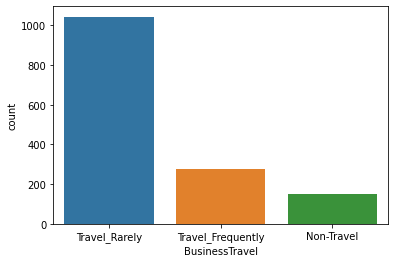

In [21]:
sns.countplot(attrition["BusinessTravel"])

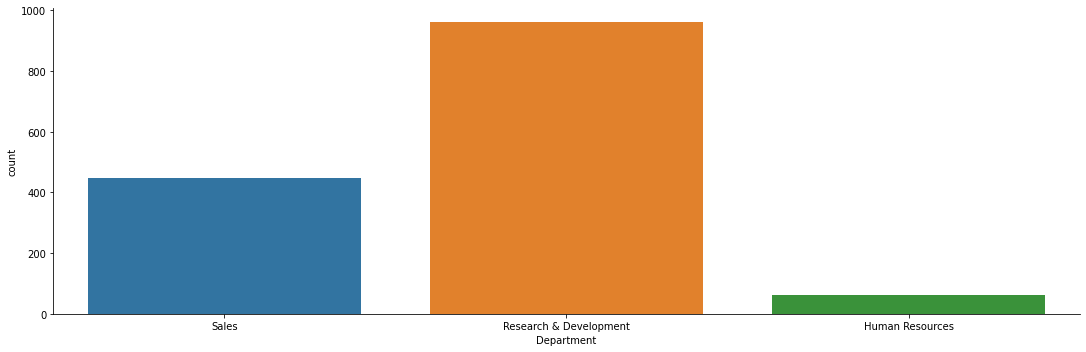

In [22]:
sns.factorplot(data=attrition,kind='count',size=5,aspect=3,x="Department")

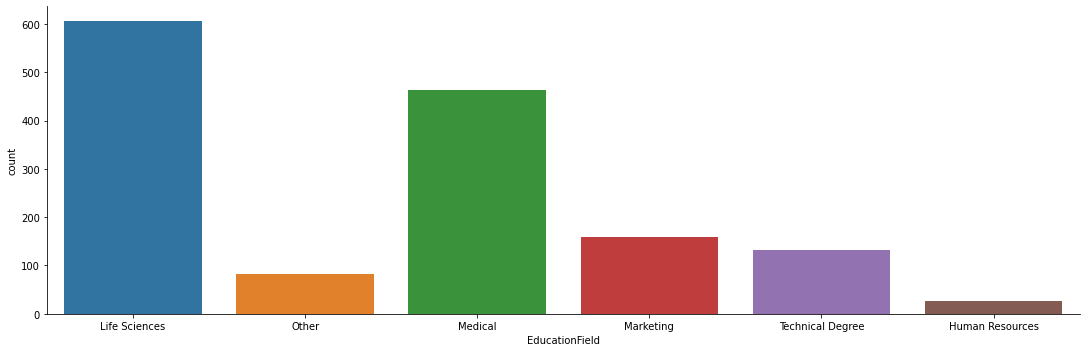

In [23]:
sns.factorplot(data=attrition,kind='count',size=5,aspect=3,x="EducationField")

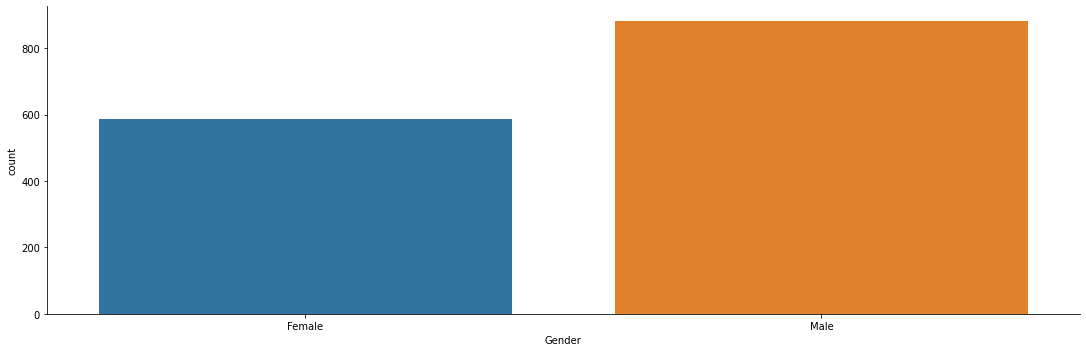

In [24]:
sns.factorplot(data=attrition,kind='count',size=5,aspect=3,x="Gender")

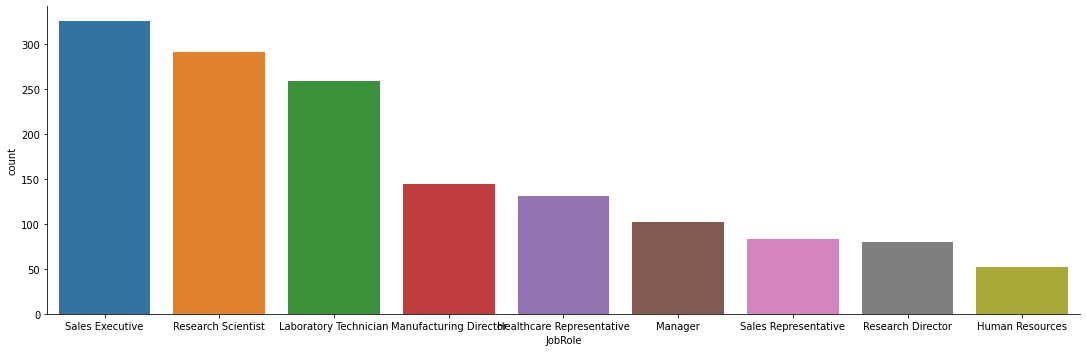

In [25]:
sns.factorplot(data=attrition,kind='count',size=5,aspect=3,x="JobRole")

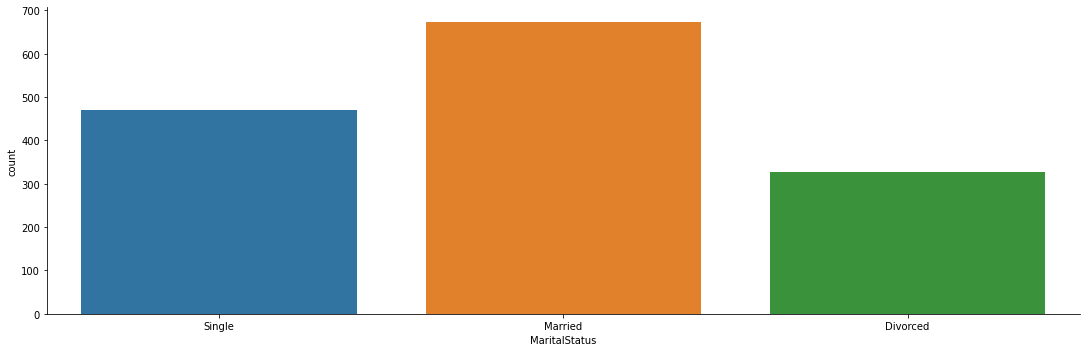

In [26]:
sns.factorplot(data=attrition,kind='count',size=5,aspect=3,x="MaritalStatus")

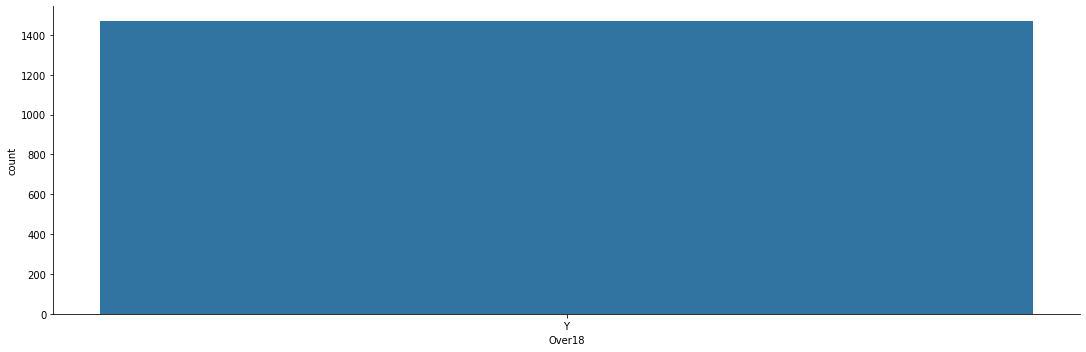

In [27]:
sns.factorplot(data=attrition,kind='count',size=5,aspect=3,x="Over18")

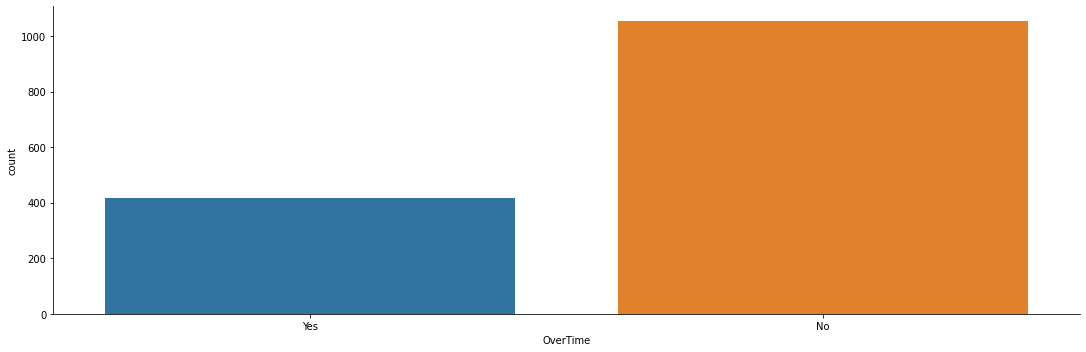

In [28]:
sns.factorplot(data=attrition,kind='count',size=5,aspect=3,x="OverTime")

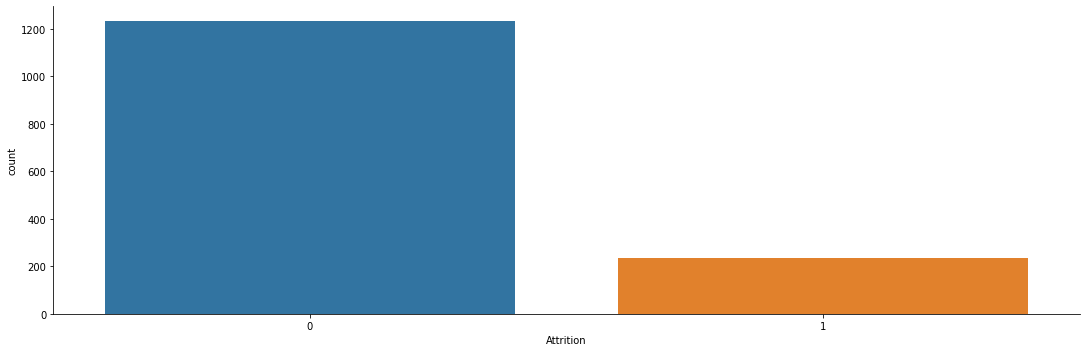

In [29]:
sns.factorplot(data=attrition,kind='count',size=5,aspect=3,x="Attrition")

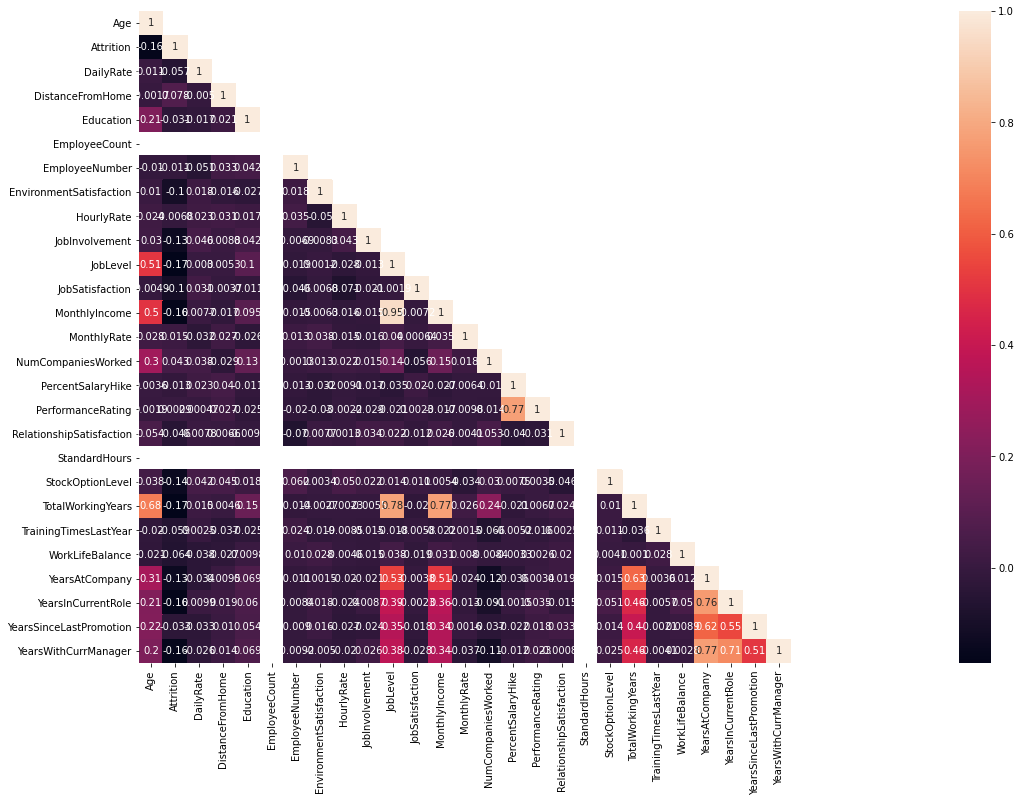

In [30]:
cor=attrition.corr()
mask=np.array(cor)
mask[np.tril_indices_from(mask)]=False
fig=plt.gcf()
fig.set_size_inches(60,12)
sns.heatmap(cor,mask=mask,annot=True,square=True,cbar=True)

# Outliers

In [31]:
attrition.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [32]:
Continous=['Age','DailyRate','HourlyRate','MonthlyRate','TotalWorkingYears','YearsAtCompany','MonthlyIncome']

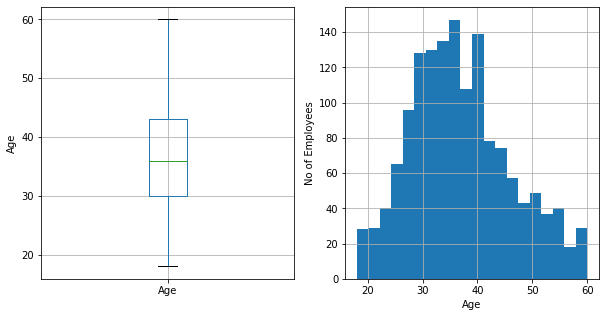

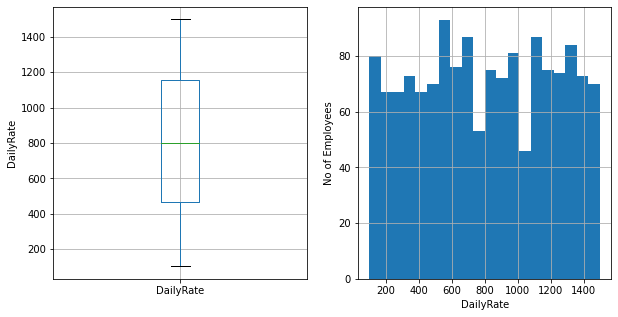

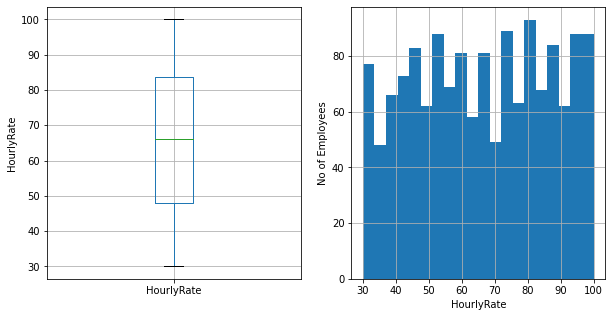

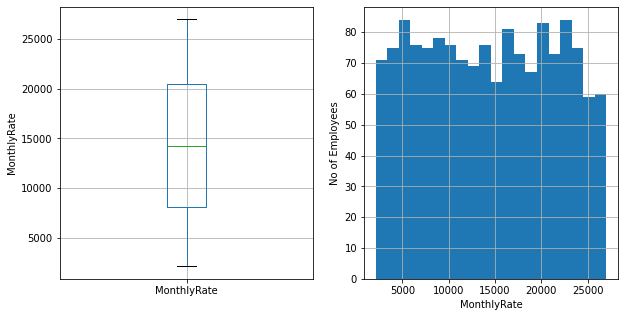

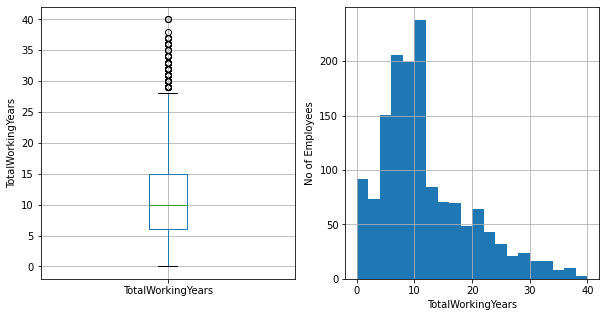

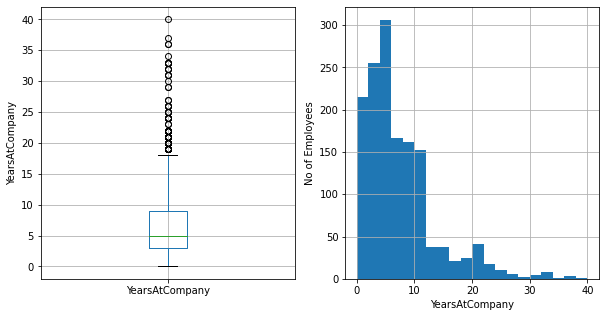

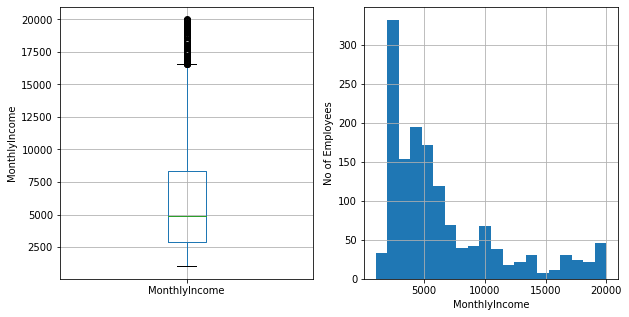

In [33]:
for var in Continous:
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    fig=attrition.boxplot(column=var)
    fig.set_ylabel(var)
    
    plt.subplot(1,2,2)
    fig=attrition[var].hist(bins=20)
    fig.set_ylabel("No of Employees")
    fig.set_xlabel(var)
    
    plt.show()

In [34]:
categorical.head()

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No


In [35]:
attrition_cat=pd.get_dummies(categorical)
attrition_cat.head()

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,0,0,1,0,0,1,0,1,0,0,...,0,0,1,0,0,0,1,1,0,1
1,0,1,0,0,1,0,0,1,0,0,...,0,1,0,0,0,1,0,1,1,0
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,1
3,0,1,0,0,1,0,0,1,0,0,...,0,1,0,0,0,1,0,1,0,1
4,0,0,1,0,1,0,0,0,0,1,...,0,0,0,0,0,1,0,1,1,0


In [36]:
numerical.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,1,1,2,94,3,2,...,1,80,0,8,0,1,6,4,0,5
1,49,279,8,1,1,2,3,61,2,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1373,2,2,1,4,4,92,2,1,...,2,80,0,7,3,3,0,0,0,0
3,33,1392,3,4,1,5,4,56,3,1,...,3,80,0,8,3,3,8,7,3,0
4,27,591,2,1,1,7,1,40,3,1,...,4,80,1,6,3,3,2,2,2,2


In [37]:
attrition_final=pd.concat([numerical,attrition_cat],axis=1)

In [38]:
attrition_final.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,41,1102,1,2,1,1,2,94,3,2,...,0,0,1,0,0,0,1,1,0,1
1,49,279,8,1,1,2,3,61,2,2,...,0,1,0,0,0,1,0,1,1,0
2,37,1373,2,2,1,4,4,92,2,1,...,0,0,0,0,0,0,1,1,0,1
3,33,1392,3,4,1,5,4,56,3,1,...,0,1,0,0,0,1,0,1,0,1
4,27,591,2,1,1,7,1,40,3,1,...,0,0,0,0,0,1,0,1,1,0


In [39]:
# Bifurgate features and target 


In [40]:
attrition_final.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Gender_Female', 'Gender_Male', 'JobR

In [41]:
target=attrition['Attrition']

# Split the data into training and testing

In [42]:
x_train,x_test,y_train,y_test=train_test_split(attrition_final,target,test_size=0.2,random_state=0)

In [43]:
x_train.shape

(1176, 55)

In [44]:
x_test.shape

(294, 55)

# Baseline model

In [45]:
model=RandomForestClassifier()
model.fit(x_train,y_train)
model_pred=model.predict(x_test)
print('Accuracy:',accuracy_score(y_test,model_pred))
print(classification_report(y_test,model_pred))

Accuracy: 0.8571428571428571
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       245
           1       0.89      0.16      0.28        49

    accuracy                           0.86       294
   macro avg       0.87      0.58      0.60       294
weighted avg       0.86      0.86      0.81       294



In [46]:
model=LogisticRegression()
model.fit(x_train,y_train)
model_pred=model.predict(x_test)
print('Accuracy:',accuracy_score(y_test,model_pred))
print(classification_report(y_test,model_pred))

Accuracy: 0.8333333333333334
              precision    recall  f1-score   support

           0       0.83      1.00      0.91       245
           1       0.00      0.00      0.00        49

    accuracy                           0.83       294
   macro avg       0.42      0.50      0.45       294
weighted avg       0.69      0.83      0.76       294



In [47]:
model=LinearDiscriminantAnalysis()
model.fit(x_train,y_train)
model_pred=model.predict(x_test)
print('Accuracy:',accuracy_score(y_test,model_pred))
print(classification_report(y_test,model_pred))

Accuracy: 0.8673469387755102
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       245
           1       0.69      0.37      0.48        49

    accuracy                           0.87       294
   macro avg       0.79      0.67      0.70       294
weighted avg       0.85      0.87      0.85       294



In [48]:
model=KNeighborsClassifier()
model.fit(x_train,y_train)
model_pred=model.predict(x_test)
print('Accuracy:',accuracy_score(y_test,model_pred))
print(classification_report(y_test,model_pred))

Accuracy: 0.7993197278911565
              precision    recall  f1-score   support

           0       0.83      0.96      0.89       245
           1       0.08      0.02      0.03        49

    accuracy                           0.80       294
   macro avg       0.46      0.49      0.46       294
weighted avg       0.71      0.80      0.75       294



In [49]:
model=DecisionTreeClassifier()
model.fit(x_train,y_train)
model_pred=model.predict(x_test)
print('Accuracy:',accuracy_score(y_test,model_pred))
print(classification_report(y_test,model_pred))

Accuracy: 0.7789115646258503
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       245
           1       0.34      0.35      0.34        49

    accuracy                           0.78       294
   macro avg       0.60      0.61      0.61       294
weighted avg       0.78      0.78      0.78       294



In [50]:
model=GaussianNB()
model.fit(x_train,y_train)
model_pred=model.predict(x_test)
print('Accuracy:',accuracy_score(y_test,model_pred))
print(classification_report(y_test,model_pred))

Accuracy: 0.7755102040816326
              precision    recall  f1-score   support

           0       0.92      0.80      0.86       245
           1       0.40      0.65      0.49        49

    accuracy                           0.78       294
   macro avg       0.66      0.73      0.67       294
weighted avg       0.83      0.78      0.80       294



In [51]:
model=SVC()
model.fit(x_train,y_train)
model_pred=model.predict(x_test)
print('Accuracy:',accuracy_score(y_test,model_pred))
print(classification_report(y_test,model_pred))

Accuracy: 0.8333333333333334
              precision    recall  f1-score   support

           0       0.83      1.00      0.91       245
           1       0.00      0.00      0.00        49

    accuracy                           0.83       294
   macro avg       0.42      0.50      0.45       294
weighted avg       0.69      0.83      0.76       294



# Oversampling with SMOTE

In [52]:
from imblearn.over_sampling import SMOTE

In [53]:
oversampler=SMOTE(random_state=0)
smote_train, smote_target=oversampler.fit_sample(x_train,y_train)

In [54]:
 smote_train.shape

(1976, 55)

In [55]:
x_train.shape

(1176, 55)

# Baseline model with SMOTE Training Data

In [56]:
model=RandomForestClassifier()
model.fit(smote_train,smote_target)
model_pred=model.predict(x_test)
print('Accuracy:',accuracy_score(y_test,model_pred))
print(classification_report(y_test,model_pred))

Accuracy: 0.8741496598639455
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       245
           1       0.77      0.35      0.48        49

    accuracy                           0.87       294
   macro avg       0.83      0.66      0.70       294
weighted avg       0.86      0.87      0.85       294



In [57]:
model=LogisticRegression()
model.fit(smote_train,smote_target)
model_pred=model.predict(x_test)
print('Accuracy:',accuracy_score(y_test,model_pred))
print(classification_report(y_test,model_pred))

Accuracy: 0.6632653061224489
              precision    recall  f1-score   support

           0       0.88      0.69      0.77       245
           1       0.26      0.55      0.35        49

    accuracy                           0.66       294
   macro avg       0.57      0.62      0.56       294
weighted avg       0.78      0.66      0.70       294



In [58]:
model=LinearDiscriminantAnalysis()
model.fit(smote_train,smote_target)
model_pred=model.predict(x_test)
print('Accuracy:',accuracy_score(y_test,model_pred))
print(classification_report(y_test,model_pred))

Accuracy: 0.8503401360544217
              precision    recall  f1-score   support

           0       0.86      0.98      0.92       245
           1       0.69      0.18      0.29        49

    accuracy                           0.85       294
   macro avg       0.77      0.58      0.60       294
weighted avg       0.83      0.85      0.81       294



In [59]:
model=KNeighborsClassifier()
model.fit(smote_train,smote_target)
model_pred=model.predict(x_test)
print('Accuracy:',accuracy_score(y_test,model_pred))
print(classification_report(y_test,model_pred))

Accuracy: 0.6496598639455783
              precision    recall  f1-score   support

           0       0.88      0.67      0.76       245
           1       0.25      0.55      0.34        49

    accuracy                           0.65       294
   macro avg       0.57      0.61      0.55       294
weighted avg       0.78      0.65      0.69       294



In [60]:
model=DecisionTreeClassifier()
model.fit(smote_train,smote_target)
model_pred=model.predict(x_test)
print('Accuracy:',accuracy_score(y_test,model_pred))
print(classification_report(y_test,model_pred))

Accuracy: 0.782312925170068
              precision    recall  f1-score   support

           0       0.88      0.86      0.87       245
           1       0.36      0.41      0.38        49

    accuracy                           0.78       294
   macro avg       0.62      0.63      0.63       294
weighted avg       0.79      0.78      0.79       294



In [61]:
model=GaussianNB()
model.fit(smote_train,smote_target)
model_pred=model.predict(x_test)
print('Accuracy:',accuracy_score(y_test,model_pred))
print(classification_report(y_test,model_pred))

Accuracy: 0.7312925170068028
              precision    recall  f1-score   support

           0       0.92      0.75      0.82       245
           1       0.34      0.65      0.45        49

    accuracy                           0.73       294
   macro avg       0.63      0.70      0.64       294
weighted avg       0.82      0.73      0.76       294



In [62]:
model=SVC()
model.fit(smote_train,smote_target)
model_pred=model.predict(x_test)
print('Accuracy:',accuracy_score(y_test,model_pred))
print(classification_report(y_test,model_pred))

Accuracy: 0.5816326530612245
              precision    recall  f1-score   support

           0       0.90      0.56      0.69       245
           1       0.24      0.69      0.36        49

    accuracy                           0.58       294
   macro avg       0.57      0.63      0.52       294
weighted avg       0.79      0.58      0.63       294



# Feature Selection

In [63]:
# Lets drop features with constant values and redundant features

In [64]:
attrition_final.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Gender_Female', 'Gender_Male', 'JobR

In [65]:
attrition_final2=attrition.drop(["EmployeeCount","EmployeeNumber","StandardHours","Over18"],axis=1)

In order to handle the outliers and non normally distributed variables we used decision tree to discritized the variables.This decision tree can find optimal number of buckets.

In [66]:
x_train,x_test,y_train,y_test=train_test_split(attrition_final2,target,test_size=0.2,random_state=0)
x_train.shape, x_test.shape

((1176, 31), (294, 31))

In [67]:
def decision_tree_discritizer(var):
    score_ls=[]
    
    for tree_depth in [1,2,3,4]:
        model_tree=DecisionTreeRegressor(max_depth=tree_depth)
        
        ## Training the model with 3 fold croos validation
        scores=cross_val_score(model_tree,x_train[var].to_frame(),y_train,cv=3,scoring="neg_mean_squared_error")
        score_ls.append(np.mean(scores))
        
    ## Finding depth with smallest MSE
    depth=[1,2,3,4][np.argmax(score_ls)]
    print(score_ls,np.argmax(score_ls),depth)
    
    
    #transform the continous variable with tree
    model_tree=DecisionTreeRegressor(max_depth=depth)
    model_tree.fit(x_train[var].to_frame(),x_train.Attrition)
    x_train[var]=model_tree.predict(x_train[var].to_frame())
    x_test[var]=model_tree.predict(x_test[var].to_frame())

In [68]:
for var in Continous:
    decision_tree_discritizer(var)

[-0.13412795004921316, -0.13061507001508835, -0.13053154931053143, -0.13232554233745816] 2 3
[-0.13586467080696, -0.13625216137455107, -0.13879063258452085, -0.14079398133028642] 0 1
[-0.13535117124283666, -0.1355041315083887, -0.13559886161275794, -0.13706393403826053] 0 1
[-0.13657478410052887, -0.139467874129482, -0.14164334107092003, -0.14330405071216143] 0 1
[-0.12846555492312384, -0.12787177512989276, -0.1284524133763431, -0.12937990673386804] 1 2
[-0.12926472938043504, -0.12841711268328906, -0.12918323864131287, -0.12907038014722338] 1 2
[-0.13056868020972215, -0.1291983654286861, -0.13361406167323656, -0.13661787760149446] 1 2


In [69]:
x_train.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1374,0.210526,0,Travel_Rarely,0.143330,Sales,21,3,Life Sciences,4,Female,...,3,3,1,0.101056,2,2,0.355072,0,0,0
1092,0.096923,0,Travel_Rarely,0.143330,Research & Development,28,3,Technical Degree,4,Male,...,4,4,1,0.188506,3,3,0.103497,4,0,3
768,0.096923,0,Travel_Rarely,0.215613,Sales,26,3,Marketing,3,Male,...,3,2,1,0.188506,3,2,0.103497,7,7,5
569,0.096923,0,Non-Travel,0.143330,Sales,8,4,Life Sciences,1,Male,...,3,2,0,0.101056,1,3,0.103497,7,0,9
911,0.268817,1,Travel_Frequently,0.143330,Sales,24,1,Life Sciences,3,Male,...,3,4,0,0.500000,4,3,0.355072,0,1,0


In [70]:
x_train[Continous].head()

,Age,DailyRate,HourlyRate,MonthlyRate,TotalWorkingYears,YearsAtCompany,MonthlyIncome
1374,0.210526,0.143330,0.162209,0.151654,0.101056,0.355072,0.024390
1092,0.096923,0.143330,0.162209,0.151654,0.188506,0.103497,0.283951
768,0.096923,0.215613,0.162209,0.151654,0.188506,0.103497,0.127877
569,0.096923,0.143330,0.162209,0.151654,0.101056,0.103497,0.127877
911,0.268817,0.143330,0.162209,0.151654,0.500000,0.355072,0.571429


In [71]:
le=LabelEncoder()

In [72]:
# Retrieving the categorical attributes
categorical=attrition_final2.select_dtypes(include="object")
categorical=categorical.columns

for var in categorical:
    x_train[var]=le.fit_transform(x_train[var])
    x_test[var]=le.fit_transform(x_test[var])

In [73]:
attrition_final2.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [74]:
cat=['DistanceFromHome','Education', 'EnvironmentSatisfaction','JobInvolvement','JobLevel','JobSatisfaction',
    'PerformanceRating','RelationshipSatisfaction','TrainingTimesLastYear','BusinessTravel',
    'Department','EducationField','Gender','JobRole','MaritalStatus',
    'OverTime','WorkLifeBalance','StockOptionLevel','NumCompaniesWorked']

for var in cat:
    x_train[var]=x_train[var].astype('object')
    x_test[var]=x_test[var].astype('object')
    
x_train=pd.get_dummies(x_train)
x_test=pd.get_dummies(x_test)

In [75]:
x_train.head()

,Age,Attrition,DailyRate,HourlyRate,MonthlyIncome,MonthlyRate,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,...,TrainingTimesLastYear_1,TrainingTimesLastYear_2,TrainingTimesLastYear_3,TrainingTimesLastYear_4,TrainingTimesLastYear_5,TrainingTimesLastYear_6,WorkLifeBalance_1,WorkLifeBalance_2,WorkLifeBalance_3,WorkLifeBalance_4
1374,0.210526,0,0.143330,0.162209,0.024390,0.151654,13,0.101056,0.355072,0,...,0,1,0,0,0,0,0,1,0,0
1092,0.096923,0,0.143330,0.162209,0.283951,0.151654,20,0.188506,0.103497,4,...,0,0,1,0,0,0,0,0,1,0
768,0.096923,0,0.215613,0.162209,0.127877,0.151654,14,0.188506,0.103497,7,...,0,0,1,0,0,0,0,1,0,0
569,0.096923,0,0.143330,0.162209,0.127877,0.151654,15,0.101056,0.103497,7,...,1,0,0,0,0,0,0,0,1,0
911,0.268817,1,0.143330,0.162209,0.571429,0.151654,14,0.500000,0.355072,0,...,0,0,0,1,0,0,0,0,1,0


In [76]:
x_train.columns

Index(['Age', 'Attrition', 'DailyRate', 'HourlyRate', 'MonthlyIncome',
       'MonthlyRate', 'PercentSalaryHike', 'TotalWorkingYears',
       'YearsAtCompany', 'YearsInCurrentRole',
       ...
       'TrainingTimesLastYear_1', 'TrainingTimesLastYear_2',
       'TrainingTimesLastYear_3', 'TrainingTimesLastYear_4',
       'TrainingTimesLastYear_5', 'TrainingTimesLastYear_6',
       'WorkLifeBalance_1', 'WorkLifeBalance_2', 'WorkLifeBalance_3',
       'WorkLifeBalance_4'],
      dtype='object', length=122)

In [77]:
x_train=x_train.drop("Attrition",axis=1)

In [78]:
x_test=x_test.drop("Attrition",axis=1)

In [79]:
x_train.columns

Index(['Age', 'DailyRate', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate',
       'PercentSalaryHike', 'TotalWorkingYears', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       ...
       'TrainingTimesLastYear_1', 'TrainingTimesLastYear_2',
       'TrainingTimesLastYear_3', 'TrainingTimesLastYear_4',
       'TrainingTimesLastYear_5', 'TrainingTimesLastYear_6',
       'WorkLifeBalance_1', 'WorkLifeBalance_2', 'WorkLifeBalance_3',
       'WorkLifeBalance_4'],
      dtype='object', length=121)

# Feature Scaling

In [80]:
sc=StandardScaler()

In [81]:
sc.fit(x_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [82]:
x_train.head()

,Age,DailyRate,HourlyRate,MonthlyIncome,MonthlyRate,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,...,TrainingTimesLastYear_1,TrainingTimesLastYear_2,TrainingTimesLastYear_3,TrainingTimesLastYear_4,TrainingTimesLastYear_5,TrainingTimesLastYear_6,WorkLifeBalance_1,WorkLifeBalance_2,WorkLifeBalance_3,WorkLifeBalance_4
1374,0.210526,0.143330,0.162209,0.024390,0.151654,13,0.101056,0.355072,0,0,...,0,1,0,0,0,0,0,1,0,0
1092,0.096923,0.143330,0.162209,0.283951,0.151654,20,0.188506,0.103497,4,0,...,0,0,1,0,0,0,0,0,1,0
768,0.096923,0.215613,0.162209,0.127877,0.151654,14,0.188506,0.103497,7,7,...,0,0,1,0,0,0,0,1,0,0
569,0.096923,0.143330,0.162209,0.127877,0.151654,15,0.101056,0.103497,7,0,...,1,0,0,0,0,0,0,0,1,0
911,0.268817,0.143330,0.162209,0.571429,0.151654,14,0.500000,0.355072,0,1,...,0,0,0,1,0,0,0,0,1,0


# Model Building

In [83]:
model=RandomForestClassifier()
model.fit(x_train,y_train)
model_pred=model.predict(x_test)
print('Accuracy:',accuracy_score(y_test,model_pred))
print(classification_report(y_test,model_pred)) 

Accuracy: 0.8537414965986394
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       245
           1       0.88      0.14      0.25        49

    accuracy                           0.85       294
   macro avg       0.86      0.57      0.58       294
weighted avg       0.86      0.85      0.81       294



In [84]:
model=LogisticRegression()
model.fit(x_train,y_train)
model_pred=model.predict(x_test)
print('Accuracy:',accuracy_score(y_test,model_pred))
print(classification_report(y_test,model_pred))

Accuracy: 0.8945578231292517
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       245
           1       0.82      0.47      0.60        49

    accuracy                           0.89       294
   macro avg       0.86      0.72      0.77       294
weighted avg       0.89      0.89      0.88       294



In [85]:
model=LinearDiscriminantAnalysis()
model.fit(x_train,y_train)
model_pred=model.predict(x_test)
print('Accuracy:',accuracy_score(y_test,model_pred))
print(classification_report(y_test,model_pred))

Accuracy: 0.8673469387755102
              precision    recall  f1-score   support

           0       0.89      0.96      0.92       245
           1       0.66      0.43      0.52        49

    accuracy                           0.87       294
   macro avg       0.77      0.69      0.72       294
weighted avg       0.85      0.87      0.86       294



In [86]:
model=KNeighborsClassifier()
model.fit(x_train,y_train)
model_pred=model.predict(x_test)
print('Accuracy:',accuracy_score(y_test,model_pred))
print(classification_report(y_test,model_pred))

Accuracy: 0.8231292517006803
              precision    recall  f1-score   support

           0       0.85      0.96      0.90       245
           1       0.40      0.12      0.19        49

    accuracy                           0.82       294
   macro avg       0.62      0.54      0.54       294
weighted avg       0.77      0.82      0.78       294



In [87]:
model=DecisionTreeClassifier()
model.fit(x_train,y_train)
model_pred=model.predict(x_test)
print('Accuracy:',accuracy_score(y_test,model_pred))
print(classification_report(y_test,model_pred))

Accuracy: 0.7721088435374149
              precision    recall  f1-score   support

           0       0.87      0.85      0.86       245
           1       0.33      0.37      0.35        49

    accuracy                           0.77       294
   macro avg       0.60      0.61      0.61       294
weighted avg       0.78      0.77      0.78       294



In [88]:
model=SVC()
model.fit(x_train,y_train)
model_pred=model.predict(x_test)
print('Accuracy:',accuracy_score(y_test,model_pred))
print(classification_report(y_test,model_pred))

Accuracy: 0.8333333333333334
              precision    recall  f1-score   support

           0       0.83      1.00      0.91       245
           1       0.00      0.00      0.00        49

    accuracy                           0.83       294
   macro avg       0.42      0.50      0.45       294
weighted avg       0.69      0.83      0.76       294



In [89]:
oversampler=SMOTE(random_state=0)
smote_train_new, smote_target_new=oversampler.fit_sample(x_train,y_train)

# Model Building with SMOTE

In [90]:
model=LogisticRegression()
model.fit(smote_train_new,smote_target_new)
model_pred=model.predict(x_test)
print('Accuracy:',accuracy_score(y_test,model_pred))
print(classification_report(y_test,model_pred))

Accuracy: 0.9081632653061225
              precision    recall  f1-score   support

           0       0.91      0.99      0.95       245
           1       0.89      0.51      0.65        49

    accuracy                           0.91       294
   macro avg       0.90      0.75      0.80       294
weighted avg       0.91      0.91      0.90       294

